# Problem Statement:

Reduction of child and maternal mortality is a crucial global health objective outlined in the United Nations' Sustainable Development Goals. By 2030, the UN aims to eliminate preventable deaths among newborns and children under 5 years of age, striving to reduce under-5 mortality to 25 per 1,000 live births worldwide. Additionally, maternal mortality remains a significant concern, with approximately 295,000 deaths occurring during and after pregnancy each year, predominantly in low-resource settings.

To address these challenges, effective monitoring of fetal health is essential. Cardiotocograms (CTGs) provide a simple and cost-effective means to assess fetal well-being, enabling healthcare professionals to take timely interventions to prevent adverse outcomes for both mother and child. CTG equipment operates by emitting ultrasound pulses and recording responses, thereby capturing crucial indicators such as fetal heart rate (FHR), fetal movements, and uterine contractions.

## Data Overview:

The dataset comprises 2,126 records of features extracted from Cardiotocogram exams. Each record has been meticulously classified into one of three classes by expert obstetricians:

1. Normal
2. Suspect
3. Pathological

## Objective:

The primary objective of this project is to develop a predictive model that can accurately classify CTG exam results into one of the three aforementioned classes. By leveraging machine learning techniques, we aim to assist healthcare professionals in early identification of fetal distress and provide timely interventions, thereby contributing to the reduction of child and maternal mortality rates.

## Approach:

1. **Data Exploration and Preprocessing:**
   - Perform exploratory data analysis (EDA) to understand the distribution of features and identify potential patterns.
   - Handle missing values, outliers, and any data inconsistencies.
   - Encode categorical variables and standardize numerical features as necessary.

2. **Model Development:**
   - Experiment with various classification algorithms such as Logistic Regression, Decision Trees, Random Forests, and Support Vector Machines (SVM).
   - Utilize techniques like cross-validation and grid search to optimize model hyperparameters.

3. **Model Evaluation:**
   - Evaluate models using performance metrics including accuracy, precision, recall, F1-score, and area under the ROC curve (AUC-ROC).
   - Assess model robustness through cross-validation and examine the confusion matrix to understand classification errors.

4. **Model Interpretation and Deployment:**
   - Interpret model coefficients and feature importances to gain insights into the factors influencing classification.
   - Deploy the final model in a healthcare setting, ensuring seamless integration with existing systems and adherence to regulatory standards.

## Tools and Libraries:
- Python (NumPy, Pandas, Matplotlib, Seaborn)
- Scikit-learn for machine learning algorithms and evaluation metrics

By addressing the classification task outlined above, this project aims to provide a valuable tool for healthcare professionals, aiding in the early detection of fetal distress and ultimately contributing to the overarching goal of reducing child and maternal mortality worldwide.


In [46]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
np.random.seed(0)

### `Loading the DATA and Basic Exploration`

In [47]:
data = pd.read_csv("fetal_health.csv")
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [48]:
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [49]:
from tabulate import tabulate
import pandas as pd

def tabulation(df):
    # Summary Statistics
    summary_stats = pd.DataFrame(df.sum())
    print(tabulate(summary_stats, headers="keys", tablefmt="grid"))
    print()

    # Duplicate Rows
    num_duplicates = df.duplicated().sum()
    print(tabulate([["Duplicate Rows", num_duplicates]], headers=["Metric", "Value"], tablefmt="grid"))
    print()

    # DataFrame Shape
    print(tabulate([["DataFrame Shape", df.shape]], headers=["Metric", "Value"], tablefmt="grid"))
    print()

    # DataFrame Info
    info = df.info()
    print(tabulate([["DataFrame Info", info]], headers=["Metric", "Value"], tablefmt="grid"))
    print()

    # Data Types
    data_types = df.dtypes.to_frame().reset_index()
    data_types.columns = ["Column", "Data Type"]
    print(tabulate(data_types, headers="keys", tablefmt="grid"))
    print()

    # Descriptive Statistics
    desc_stats = df.describe()
    print(tabulate(desc_stats, headers="keys", tablefmt="grid"))
    print()

# Call tabulation() function with your DataFrame
tabulation(data)


+--------------------------------------------------------+------------+
|                                                        |          0 |
+========================================================+============+
| baseline value                                         | 283404     |
+--------------------------------------------------------+------------+
| accelerations                                          |      6.757 |
+--------------------------------------------------------+------------+
| fetal_movement                                         |     20.156 |
+--------------------------------------------------------+------------+
| uterine_contractions                                   |      9.283 |
+--------------------------------------------------------+------------+
| light_decelerations                                    |      4.017 |
+--------------------------------------------------------+------------+
| severe_decelerations                                   |      

In [50]:
data.drop_duplicates(inplace=True)

C:\Users\faisa\AppData\Local\Temp\ipykernel_18008\1536796363.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= data, x="fetal_health",palette=colours)


<Axes: xlabel='fetal_health', ylabel='count'>

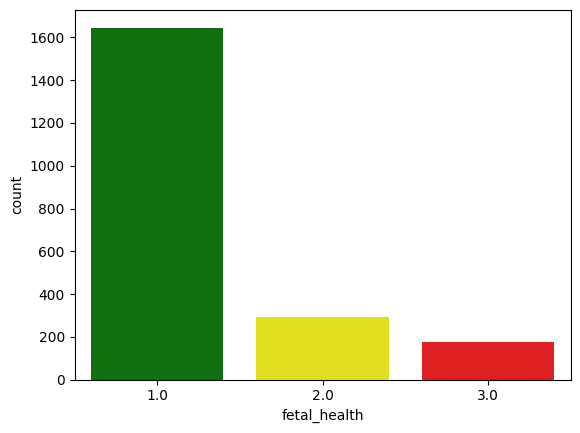

In [51]:
colours=['green','yellow','red']
sns.countplot(data= data, x="fetal_health",palette=colours)

c:\Users\faisa\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


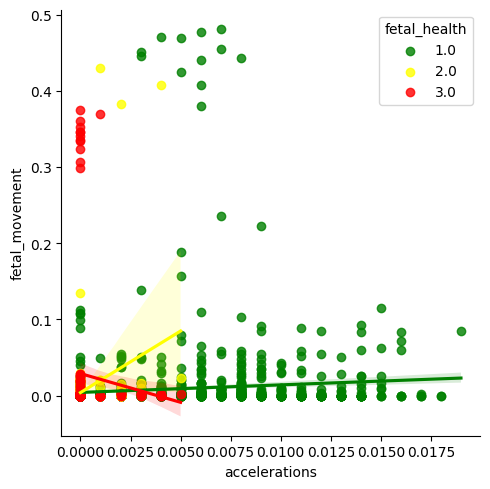

In [52]:
sns.lmplot(data =data,x="accelerations",y="fetal_movement",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

C:\Users\faisa\AppData\Local\Temp\ipykernel_18008\323485372.py:8: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.lineplot(data=data, x="accelerations", y="fetal_movement", hue="fetal_health", palette=bright_palette)


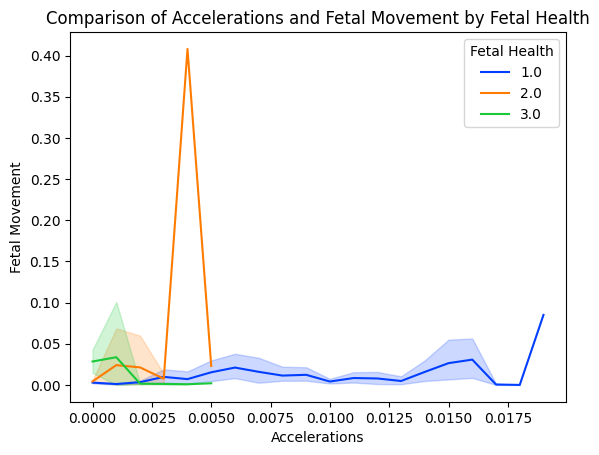

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a bright color palette
bright_palette = sns.color_palette("bright")

# Create a line plot comparing accelerations and fetal movement with fetal health as hue
sns.lineplot(data=data, x="accelerations", y="fetal_movement", hue="fetal_health", palette=bright_palette)
plt.title("Comparison of Accelerations and Fetal Movement by Fetal Health")
plt.xlabel("Accelerations")
plt.ylabel("Fetal Movement")
plt.legend(title="Fetal Health")
plt.show()


C:\Users\faisa\AppData\Local\Temp\ipykernel_18008\3289558367.py:8: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.lineplot(data=data, x="prolongued_decelerations", y="fetal_movement", hue="fetal_health", palette=bright_palette)


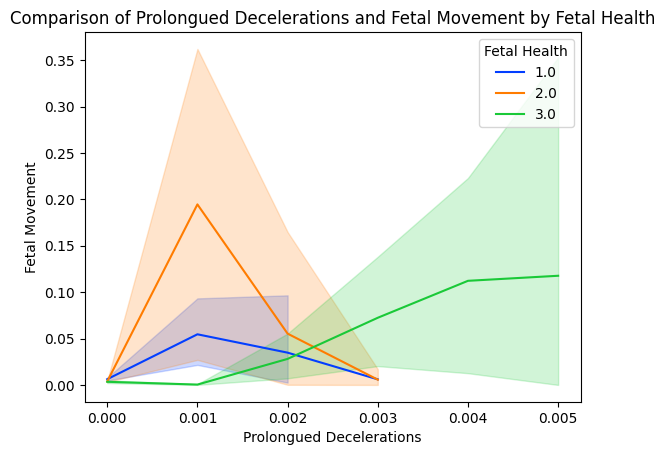

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a bright color palette
bright_palette = sns.color_palette("bright")

# Create a line plot comparing prolongued_decelerations and fetal movement with fetal health as hue
sns.lineplot(data=data, x="prolongued_decelerations", y="fetal_movement", hue="fetal_health", palette=bright_palette)
plt.title("Comparison of Prolongued Decelerations and Fetal Movement by Fetal Health")
plt.xlabel("Prolongued Decelerations")
plt.ylabel("Fetal Movement")
plt.legend(title="Fetal Health")
plt.show()


c:\Users\faisa\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


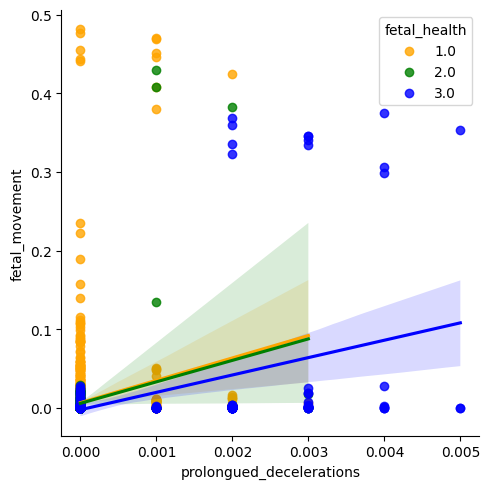

In [55]:
bright_palette = ["#FFA500", "#008000", "#0000FF"]

sns.lmplot(data =data,x="prolongued_decelerations",y="fetal_movement",palette=bright_palette, hue="fetal_health",legend_out=False)
plt.show()

c:\Users\faisa\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


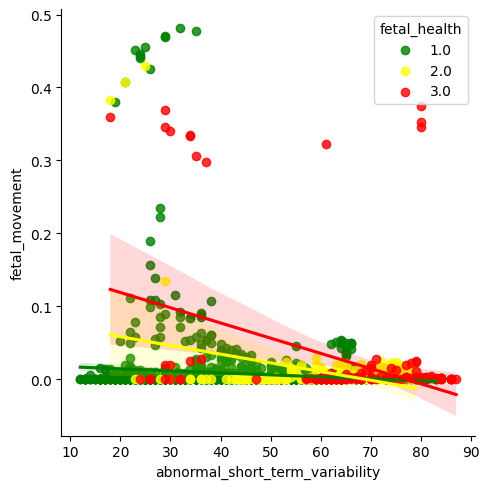

In [56]:
sns.lmplot(data =data,x="abnormal_short_term_variability",y="fetal_movement",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

<Axes: >

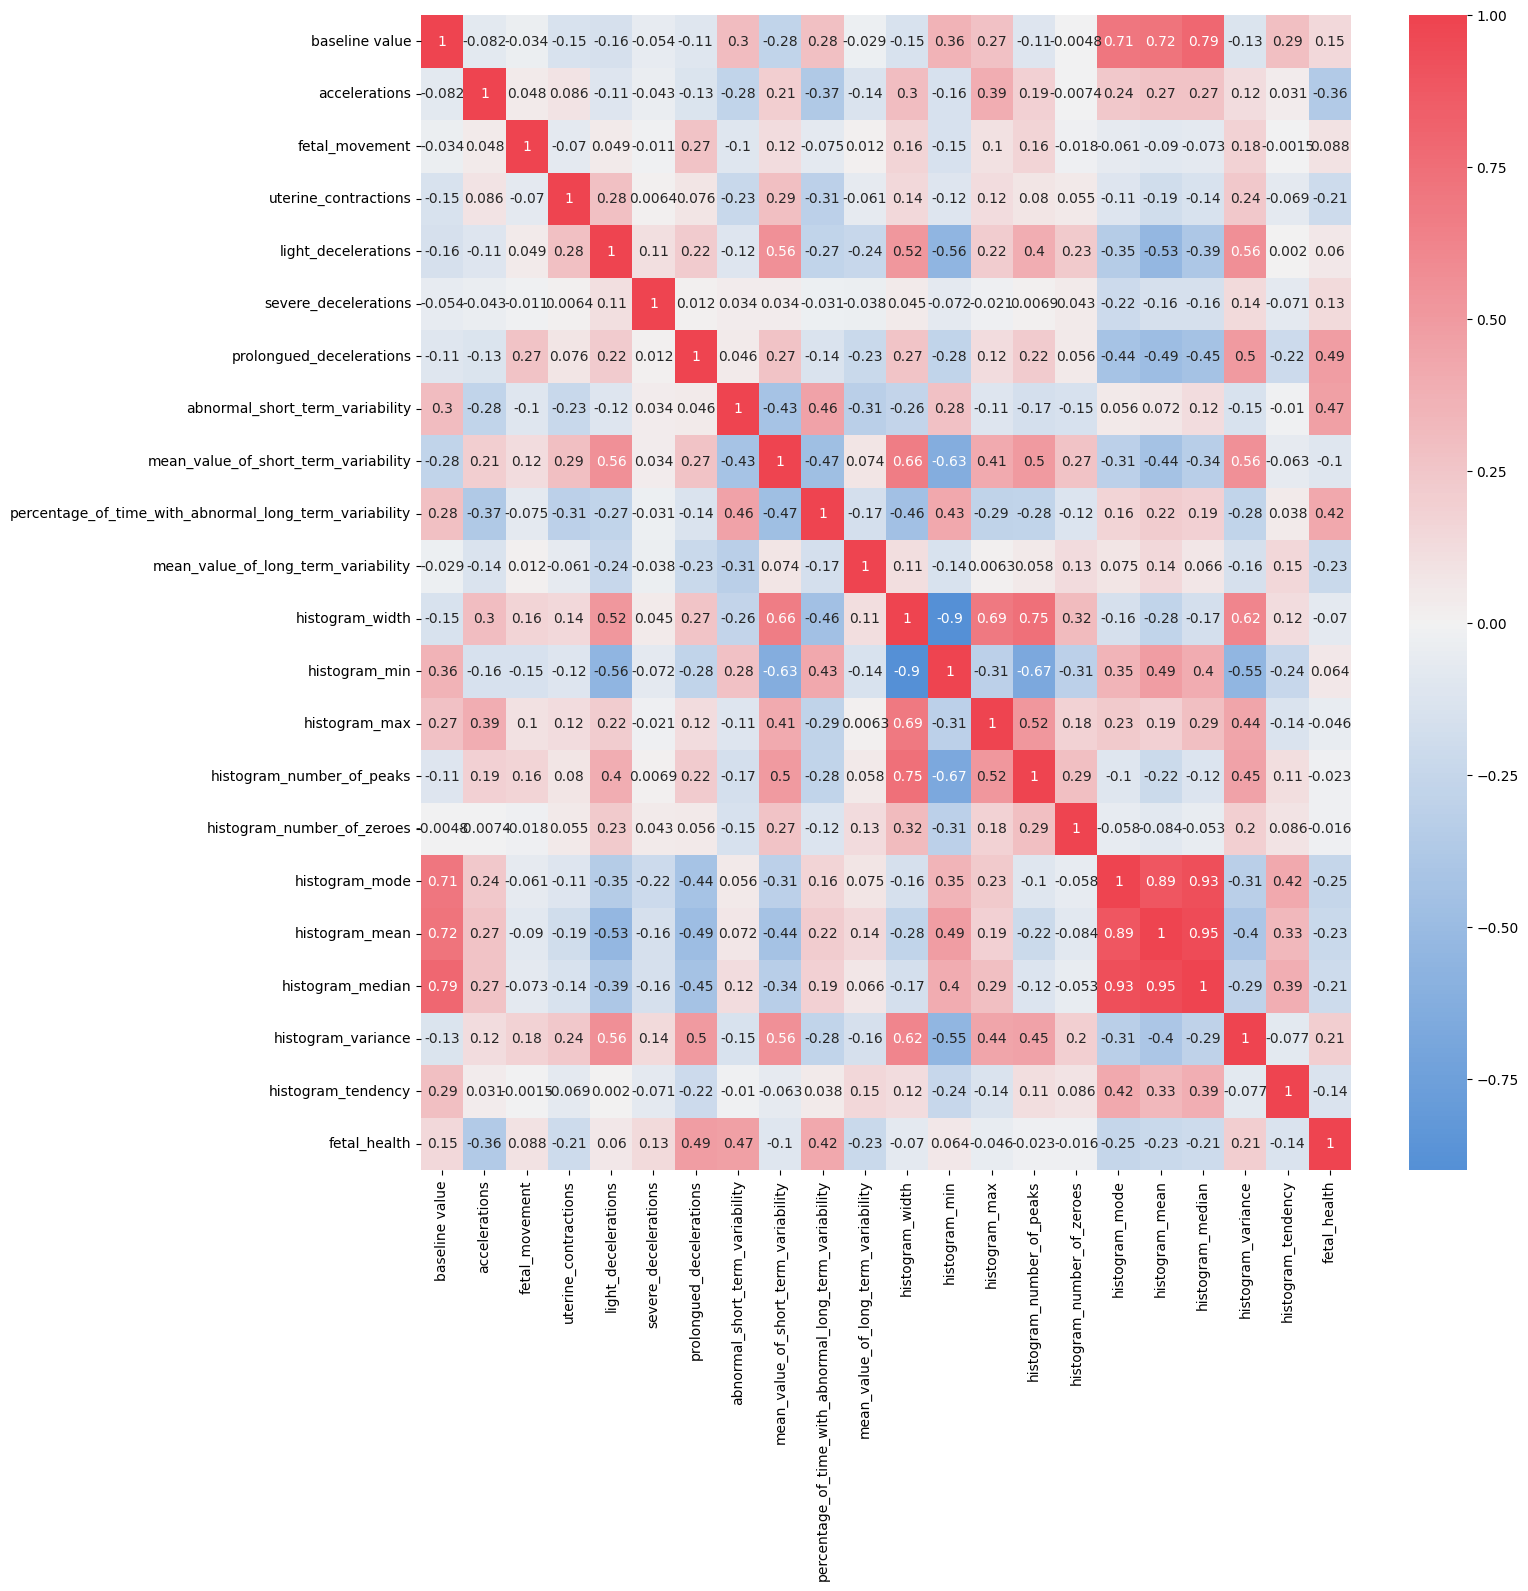

In [57]:
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(15,15))  

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

In [58]:
#assigning values to features as X and target as y
X=data.drop(["fetal_health"],axis=1)
y=data["fetal_health"]

#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)   


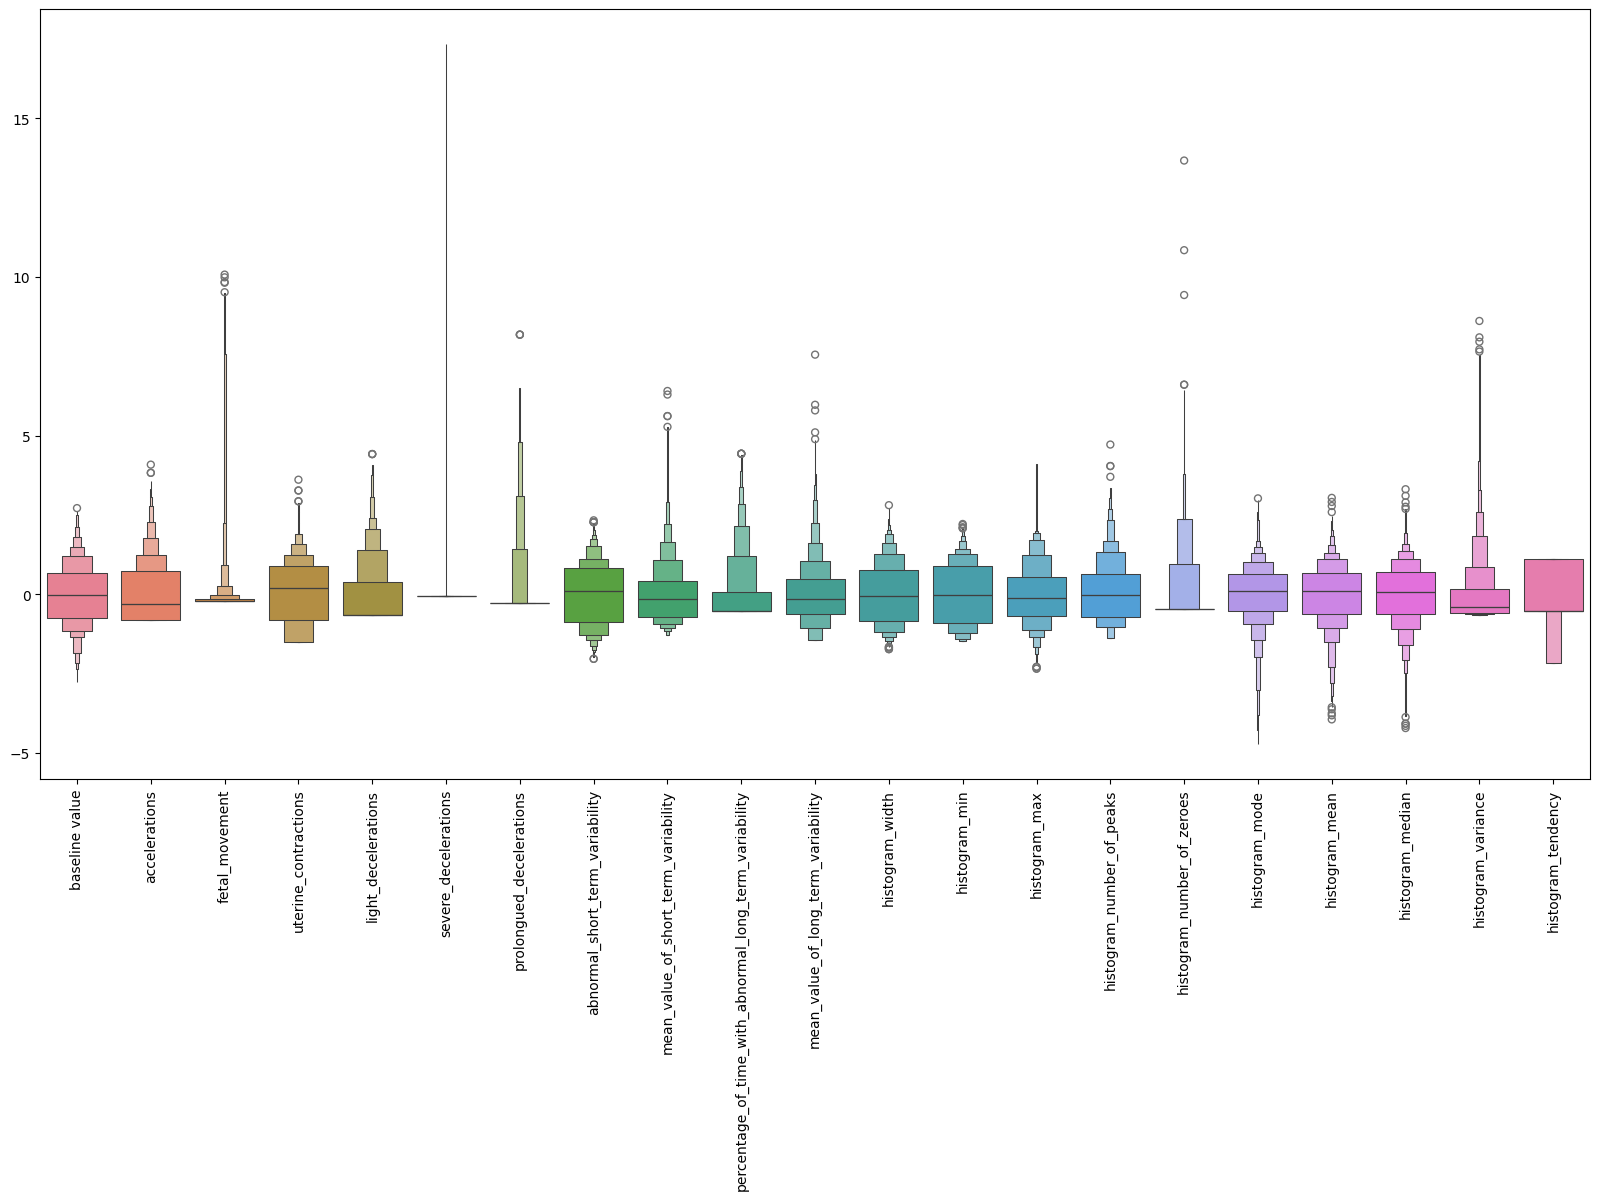

In [60]:
#looking at the scaled features
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_df)
plt.xticks(rotation=90)
plt.show()

In [61]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.3,random_state=42)

In [62]:
#A quick model selection process
#pipelines of models( it is short was to fit and pred)
pipeline_lr=Pipeline([('lr_classifier',LogisticRegression(random_state=42))])

pipeline_dt=Pipeline([ ('dt_classifier',DecisionTreeClassifier(random_state=42))])

pipeline_rf=Pipeline([('rf_classifier',RandomForestClassifier())])

pipeline_svc=Pipeline([('sv_classifier',SVC())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svc]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: "SVC"}


# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

#cross validation on accuracy 
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train, cv=10 )
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

Logistic Regression: 0.886418 
Decision Tree: 0.919535 
RandomForest: 0.939828 
SVC: 0.899260 


In [63]:
#taking look at the test set
pred_rfc = pipeline_rf.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)
print(accuracy)

0.9558359621451105


In [67]:
#Building a dictionalry with list of optional values that will me analyesed by GridSearch CV
parameters = { 
    'n_estimators': [100,150, 200,500,700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,6,8,12,14,16],
    'criterion' :['gini', 'entropy'],
    'n_jobs':[-1,1,None]
}

In [68]:
#Fitting the trainingset to find parameters with best accuracy

CV_rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, cv= 5)
CV_rfc.fit(X_train, y_train)

#Getting the outcome of gridsearch

CV_rfc.best_params_

In [ ]:
RF_model = RandomForestClassifier(**CV_rfc.best_params_)
RF_model.fit(X_train, y_train)
#Testing the Model on test set
predictions=RF_model.predict(X_test)
acccuracy= accuracy_score(y_test,predictions)
acccuracy

In [ ]:
acccuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average="weighted")
precision = precision_score(y_test, predictions, average="weighted")
f1_score = f1_score(y_test, predictions, average="micro")

print("********* Random Forest Results *********")
print("Accuracy    : ", acccuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("F1 Score    : ", f1_score)

In [ ]:
print(classification_report(y_test, predictions))

In [ ]:
# cofusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=cmap,annot = True, annot_kws = {'size':15})